# CC3001 Otoño 2021 Tarea 5
# Inserción en la raíz en un ABB
## Profesores
Patricio Poblete, Nelson Baloian, Ivan Sipiran

Alumno: Pablo González Aguilera - 20973277-7 - Sección 2


---

# CONTEXTO

El algoritmo usual de inserción en un ABB realiza una búsqueda infructuosa para la nueva llave, y la coloca en el lugar de la hoja en donde termina la búsqueda. Se dice que es una *inserción en las hojas*.

Por contraposición, un algoritmo de *inserción en la raíz* deja la nueva llave como raíz del árbol resultante. En el apunte aparece un algoritmo de este tipo basado en *rotaciones*.

El objetivo de esta tarea es implementar inserción en la raíz de un ABB usando un algoritmo alternativo, basado en la operación ``cut``(corte).

Para comenzar, recordemos esta implementación del algoritmo de inserción usual (inserción en las hojas) adaptada del apunte:

In [9]:
!pip install aed-utilities
import aed_utilities as aed

You should consider upgrading via the 'c:\users\pablo\pyver\py392\python.exe -m pip install --upgrade pip' command.


In [10]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))

class Nodoe:
    def __init__(self):
        pass
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

Probemos este algoritmo con una secuencia de inserciones:

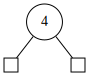

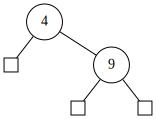

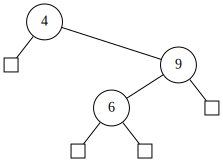

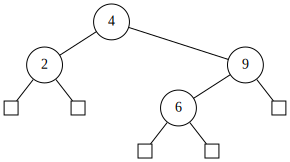

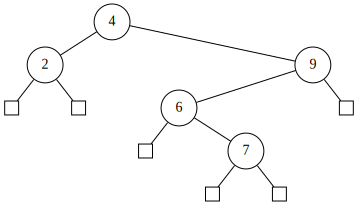

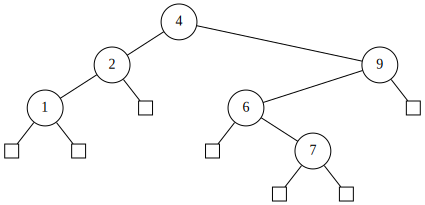

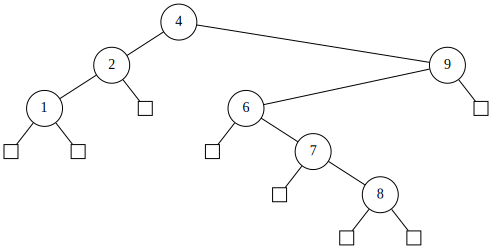

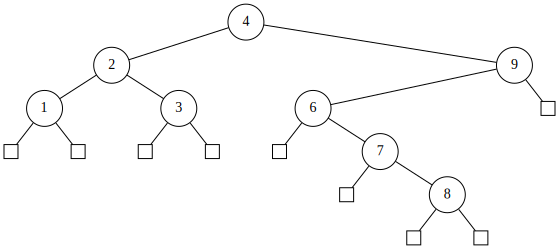

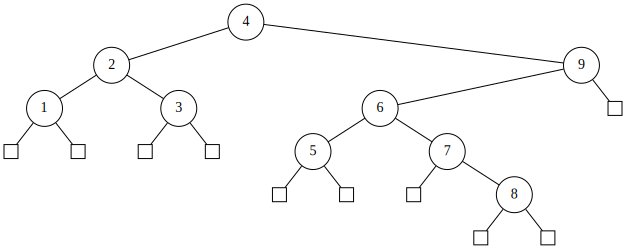

In [11]:
lista=[4,9,6,2,7,1,8,3,5]
a=Arbol()
for x in lista:
    a.insert(x)
    a.dibujar()

Para definir el algoritmo de inserción en la raíz, definimos primero la operación ``cut(x)``. La idea es la siguiente: dado un árbol $A$ y una llave $x$ que no está en el árbol, el resultado de ejecutar $\text{cut}(x)$ sobre el árbol $A$ es una tupla $(A_{<x},A_{>x})$, que contiene como primera componente el árbol que contiene solo las llaves que son menores que $x$, y similarmente la segunda componente es el árbol con las llaves mayores que $x$. Por ejemplo:

![T5-cut](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut.png?raw=1)

La operación ``cut(x)`` se puede definir recursivamente:

Para el caso de un árbol no vacío con raíz $r$, con $x<r$:

![T5-cut2](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut2.png?raw=1)

El caso $x>r$ es simétrico.

El caso de borde es que al hacer ``cut(x)``sobre un nodo ☐, el resultado es una tupla (☐,☐).

En base a esta operación ``cut(x)``, es fácil definir una operación ``root_insert(x)``. En efecto, para insertar una nueva llave $x$ en la raíz de un árbol $A$, se hace un corte con $x$ al árbol $A$, y luego se construye el árbol

![T5-cut3](https://github.com/ppoblete/CC3001-2020-2-Tareas/blob/master/T5-cut3.png?raw=1)

# INSTRUCCIONES

## Parte 1: ``cut(x)`` y ``root_insert(x)``

Modifique las clases provistas para agregar la operación ``cut(x)``y la operación ``root_insert(x)``. Escriba acá su código para las clases completas:

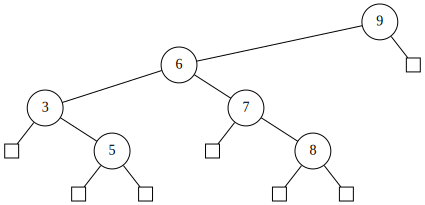

In [1]:
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        
    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            return Nodoi(self.izq.insert(x),self.info,self.der)
        else:
            return Nodoi(self.izq,self.info,self.der.insert(x))

    def cut(self, x):

        r = self.info
        assert x != r

        # if type(self.izq) == Nodoe or type(self.der) == Nodoe:
        #     return("☐","☐")


        if x < r:

            izqMenorX = self.izq.cut(x)[0] 
            izqMayorX = self.izq.cut(x)[1] 

            j = Nodoi(izqMayorX, r, self.der) 

            tuplaCasoMenor = (izqMenorX,j)

            return tuplaCasoMenor

        if x > r:
            derMenorX = self.der.cut(x)[0] 
            derMayorX = self.der.cut(x)[1] 

            j = Nodoi(self.izq, r, derMayorX)

            tuplaCasoMayor = (j,derMenorX)
            
            return tuplaCasoMayor

    def root_insert(self,x):
        pass


class Nodoe:
    def __init__(self):
        pass
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())

    def root_insert(self, x):
        return Nodoi(Nodoe(),x,Nodoe())

    def cut(self,x):
        #Caso base
        #return("☐","☐")
        return(Nodoe(),Nodoe())

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz     
        
    def insert(self,x):
        self.raiz=self.raiz.insert(x)
    
    def cut(self, x):
        #Caso 1: x está en la rama izquierda del árbol
        return self.raiz.cut(x)

    def root_insert(self, x):
        corteArbol = self.raiz.cut(x) 

        izq = corteArbol[0] 
        der = corteArbol[1]  


        self.raiz = Nodoi(izq, x, der)
        
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe, drawNull=True)
      btd.draw_tree(self, "raiz")

    
lista=[9,6,2,7,1,8,3,5]
a=Arbol()
for m in lista:
    a.insert(m)

# a.dibujar()

tuplaCortada = a.cut(4)

menorX , mayorX = tuplaCortada[0], tuplaCortada[1]

t = Arbol(tuplaCortada[1])
t. dibujar()
# Arbol(tuplaCortada[1]).dibujar

# lista=[9,6,2,7,1,8,3,5]
# a=Arbol()
# for m in lista:
#     a.root_insert(m)
#     # a.dibujar()

# a.dibujar()

## Parte 2: Evaluación experimental

A continuación, ejecute lo siguiente para probar su implementación:

In [14]:
lista=[4,9,6,2,7,1,8,3,5]
a=Arbol()
for x in reversed(lista):
    a.root_insert(x)
    a.dibujar()

Error: Could not open "lista.gv.pdf" for writing : Permission denied


CalledProcessError: Command '['dot', '-Kneato', '-Tpdf', '-O', 'lista.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "lista.gv.pdf" for writing : Permission denied\r\n']

Si todo está bien, el resultado final de insertar la lista reversa usando ``root_insert``debería ser igual al obtenido insertando la lista original usando ``insert``.

## ¿Qué hay que entregar?

Usted debe entregar este mismo archivo, modificado de acuerdo a lo que se pide. Haga todos los cambios necesarios para explicar y documentar adecuadamente su código. No olvide poner su nombre.